<a href="https://colab.research.google.com/github/RuyiSheep/MIS-382N-ry/blob/main/HW1_Team2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIS382N: Homework 1

Submit:

A read-only link to your colab notebook, executed and saved (so that we can run it, but don't necessarily have to, to see your results).

For any questions that require written explanation, please use Markdown - it is a lot easier for us to read than comments in the code.

**If you used any AI help, please describe how you used it and what you used.**

**Goals of this Lab:**
1.  Practice with Pandas, Numpy and Data Exploration.
2.  Training vs testing error
3.  Review important results from probability, such as the CLT.


## AI Usage disclosure
I used AI to guide me through my assignment by asking specific questions about data cleaning and handling missing values. It helped me find the pandas method to replace characters like "?" with NaN, fill them with column means, and check datatypes.

In [ ]:
# Some useful libraries
import numpy as np
from numpy.random import default_rng

#Pandas for data structure and analysis tools
import pandas as pd

#seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#for nice vector graphics
%matplotlib inline

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf')

np.random.seed(42) # Fixed seed for reproducibility
rng = default_rng(42)

### Problem 1

Download from Canvas/Files the dataset ``PatientData.csv``. Each row is a patient and the last column is the condition that the patient has.  Do data exploration using Pandas and other visualization tools to understand what you can about the data set. For example:

Part 1.  How many patients and how many features are there?

Part 2.  What is the meaning of the first 4 features?  See if you can understand what they mean.

Part 3.  Are there missing values?  Replace them with the average of the corresponding feature column

Part 4.  How could you test which features strongly influence the patient condition and which do not? List what you think are the three most important features.

### Part 1

In [ ]:
#import data
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/HW-Dataset/PatientData.csv'
patient_data = pd.read_csv(file_path, header = None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
row, col = patient_data.shape
print(f"There are {row} patients and {col} features in the dataset.")

There are 452 patients and 280 features in the dataset.


### Part 2
The first column may be "Age" as it follows the national age distribution with min and max in an approximately 0-90 range.  
The second column may be "Gender" as it is boolean and almost balanced.  
The third column may be "Height (cm)" and
the fourth column may be "Weight (kg)" as the data points falls in the range of possible height and weight, and centered at the common height and weight valye

In [ ]:
# Take a initial look at data
patient_data.iloc[:1,:4]

,0,1,2,3
0,75,0,190,80


In [ ]:
# Exploratory data analysis
col1 = patient_data.iloc[:,0]
col2 = patient_data.iloc[:,1]
col3 = patient_data.iloc[:,2]
col4 = patient_data.iloc[:,3]

Text(0, 0.5, 'Frequency')

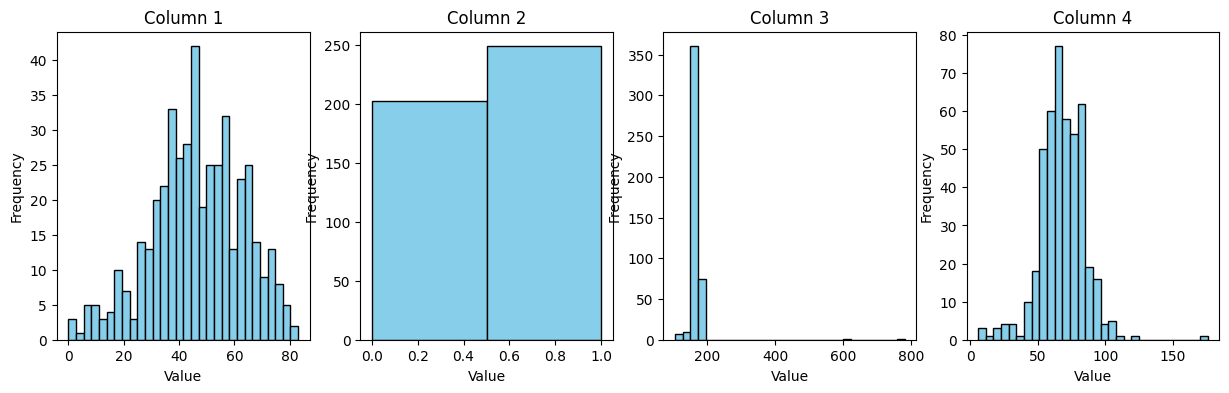

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
axes[0].hist(col1, bins=30, color="skyblue", edgecolor="black")
axes[0].set_title("Column 1")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

axes[1].hist(col2, bins=2, color="skyblue", edgecolor="black")
axes[1].set_title("Column 2")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

axes[2].hist(col3, bins=30, color="skyblue", edgecolor="black")
axes[2].set_title("Column 3")
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Frequency")

axes[3].hist(col4, bins=30, color="skyblue", edgecolor="black")
axes[3].set_title("Column 4")
axes[3].set_xlabel("Value")
axes[3].set_ylabel("Frequency")

### Part 3

There are in total 408 missing values in the dataset


In [55]:
print(f"the null value count in original dataset is: {(patient_data == '?').sum().sum()}")
df = patient_data.apply(pd.to_numeric, errors="coerce")
df = df.fillna(df.mean(numeric_only=True))
print(f"the null value count after substituting is: {(df == '?').sum().sum()}")

the null value count after substituting is: 408
the null value count after substituting is: 0


### Part 4

To understand which feature has strongest influence, I want to standardize the data first, and then build a linear model between all the independent features and dependent features to compare the absolute value of their coefficients

The most important feature is feature # 204, the second important is 264, and the third important is #274 (0-index based)


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X, y = df.iloc[:, :-1], df.iloc[:, -1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression().fit(X_scaled, y)
importances = model.coef_[0]

In [63]:
import heapq
res = []
for i, importance in enumerate(importances):
    heapq.heappush(res, (-abs(importance), i))
    if len(res) > 3:
      heapq.heappop(res)
ans = []
while res:
  importance, i =  heapq.heappop(res)
  ans.append(i)
print(ans)



[204, 264, 274]


### Problem 2

We looked at the MNIST data set in class (see the notebook in ``pages`` in Canvas). Recall that MNIST is a data set of handwritten digits. It is considered one of the ``easiest'' image recognition problems in computer vision, and we will see it again.

This exercise is simple exercise, and an opportunity to play around with this data set.

**Parts 1 to 7: Nothing to submit!** just run through the notebook we saw in class and try to make sure you understand all the commands.

Part 1. Make sure you can run through the entire Colab notebook posted. Especially if you haven't used Python, try to understand what every line is doing.

Part 2. How many data points are there, how many features are there, and what do the features represent?

Part 3. Compute how many times each digit appears in the dataset.

Part 4. Read the documentation for sklearn.model_selection.train_test_split and explain what this does.

Part 5. Read the documentation for DecisionTreeClassifier, and explain what score means.

Part 6. What happens to the **training score** as you increase the depth of the tree? Explain.

Part 7. What happens to the difference between **training score** and **testing score** as you increase the depth of the tree? Explain.

**Only submit your answer to this part**

Part 8. Fix the depth of the tree. For this example, use depth=6 (nothing special about the number 6, just to illustrate the concept). Then plot the difference of training score - testing score when you train on: 100, 500, 5000, 10000, 20,0000, 60,000 training points, always computing testing score by evaluating on the 10,000 testing points. Plot this trend.  Try to explain what you are seeing.  


In [ ]:
# Load and preprocess data
from torchvision import datasets, transforms

# Custom transform to convert tensor to numpy array and remove channel dimension
class ToNumpyNoChannel:
    def __call__(self, tensor):
        return tensor.squeeze(0).numpy()  # Remove channel dimension (C, H, W -> H, W)

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts PIL image to PyTorch tensor
    transforms.Normalize(mean=(0.5,), std=(0.5,)),  # Normalize to [-1, 1]
    ToNumpyNoChannel()  # Convert tensor to numpy array and remove channel dimension
])

# Load datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Access data and labels as NumPy arrays
X_train = np.array([train_dataset[i][0] for i in range(len(train_dataset))])  # Features
y_train = np.array([train_dataset[i][1] for i in range(len(train_dataset))])  # Labels
X_test = np.array([test_dataset[i][0] for i in range(len(test_dataset))])    # Features
y_test = np.array([test_dataset[i][1] for i in range(len(test_dataset))])    # Labels

# Random permutation of data
from sklearn.utils import check_random_state

random_state = check_random_state(42)
permutation = random_state.permutation(X_train.shape[0])
X_train = X_train[permutation]
y_train = y_train[permutation]
permutation = random_state.permutation(X_test.shape[0])
X_test = X_test[permutation]
y_test = y_test[permutation]


In [ ]:
# Check data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [ ]:
from logging import NullHandler
# Create model
from sklearn import tree

datasize = [100, 500, 5000, 10000, 20000, 60000]
train_score_list = []
test_score_list = []

for d in datasize:
  X_tr = X_train[:d,:]
  y_tr = y_train[:d]

  decision_tree = tree.DecisionTreeClassifier(max_depth=6)
  decision_tree.fit(X_tr, y_tr)
  train_score = decision_tree.score(X_tr,y_tr)
  test_score = decision_tree.score(X_test,y_test)

  train_score_list.append(train_score)
  test_score_list.append(test_score)


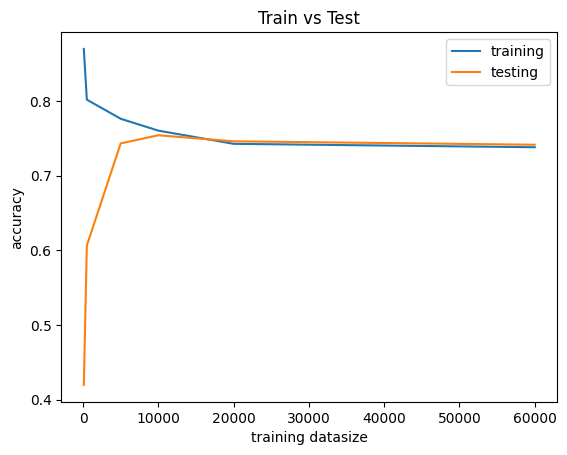

In [ ]:
# Plot train-test score errors
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(datasize, train_score_list,label='training')
ax.plot(datasize, test_score_list,label='testing')
ax.set_xlabel('training datasize')  # Add an x-label to the axes.
ax.set_ylabel('accuracy')  # Add a y-label to the axes.
ax.set_title("Train vs Test")  # Add a title to the axes.
ax.legend();  # Add a legend.

I can see that as the training dataset size increases, the training score decreases while the testing score increases. Eventually, the two curves converge around 20,000 training data points, at an accuracy of about 0.74. This indicates that the model has reached its capacity when we use approximately 20,000 data points.

### Problem 3

We now turn to a somewhat more sophisticated data set: CIFAR10.

Load the data using:
```
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
```

Part 1. How many data points are there, and how many labels? How many points for each label?

Part 2. Figure out how to display some of the images from CIFAR10.

Part 3: Reshape X_train into a matrix X_tr so that each row is a data point.
 What are the dimensions of X_train?

Part 4: Generate decision trees of depth 1 to 15, and for each, compute the training accuracy and the testing accuracy.

If you did this correctly and ran the notebook, you noticed that CIFAR10 indeed looks like a ``harder'' problem. Deep trees are again doing very well on the training set, and they do a little better than guessing on the testing data, but not as well as they do on MNIST. We will revisit CIFAR10 several times, as we develop more powerful tools. And we will see that we will do much better than deep decision trees!

### Part1
There are 50,000 data points in training dataset and 10,000 data points in testing dataset.
There fore 10 labels and each label has 5,000 data points.

In [ ]:
# Load dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [ ]:
# Check data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [ ]:
# Check label size and counter
unique_labels, counts = np.unique(y_train, return_counts=True)

for label, count in zip(unique_labels, counts):
    print(f"Digit {label}: {count} occurrences")

Digit 0: 5000 occurrences
Digit 1: 5000 occurrences
Digit 2: 5000 occurrences
Digit 3: 5000 occurrences
Digit 4: 5000 occurrences
Digit 5: 5000 occurrences
Digit 6: 5000 occurrences
Digit 7: 5000 occurrences
Digit 8: 5000 occurrences
Digit 9: 5000 occurrences


### Part 2
The display of index 730 is shown below

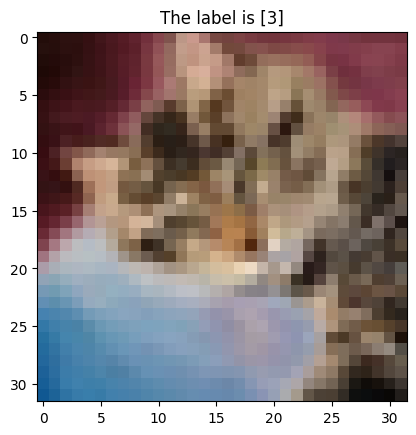

In [ ]:
# pick random index to display
index = 730
img = X_train[index]
label = y_train[index]

# Plot it along with its label
plt.title('The label is {label}'.format(label=label))
plt.imshow(img)
plt.show()

### Part 3

In [ ]:
X_tr = X_train.reshape((X_train.shape[0], -1))
print(f"Dimensions of X_tr is: {X_tr.shape}")

Dimensions of X_tr is: (50000, 3072)


### Part 4


In [ ]:
X_test = X_test.reshape((X_test.shape[0], -1))

In [ ]:
# Generate decision tree from depth 1 to 15
# The model was too large to train so I am using partial of training data for now

X_train_partial = X_tr[:1000, :]
y_train_partial = y_train[:1000]
from sklearn import tree

training_scores = []
testing_scores = []
depth_values = range(15)
for depth in depth_values:
    #print(depth)
    dt = tree.DecisionTreeClassifier(max_depth=depth+1, criterion='gini')
    dt.fit(X_train_partial,y_train_partial)
    train_score = dt.score(X_train_partial,y_train_partial)
    test_score = dt.score(X_test, y_test)
    training_scores.append(train_score)
    testing_scores.append(test_score)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [ ]:
# Only run these when student offer activated

# from sklearn import tree

# training_scores = []
# testing_scores = []
# depth_values = range(15)
# for depth in depth_values:
#     #print(depth)
#     dt = tree.DecisionTreeClassifier(max_depth=depth+1, criterion='gini')
#     dt.fit(X_tr,y_train)
#     train_score = dt.score(X_tr,y_train)
#     test_score = dt.score(X_test, y_test)
#     training_scores.append(train_score)
#     testing_scores.append(test_score)

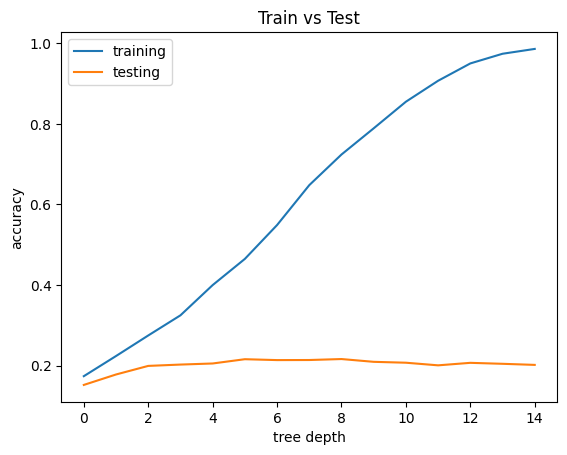

In [ ]:
# Compare training and testing scores on graph
fig, ax = plt.subplots()
ax.plot(training_scores,label='training')
ax.plot(testing_scores,label='testing')
ax.set_xlabel('tree depth')
ax.set_ylabel('accuracy')
ax.set_title("Train vs Test")
ax.legend();

# The next two problems are optional, but recommended

We will be generating lots of random data sets in this class, in order to test the behavior of machine learning algorithms.

So it's useful to know how to generate random data, and display it.

### Problem 4 (Optional, recommended)

**Part 1.** Generate 1,000 samples of 2 dimensional data from the Gaussian distribution $\left(\begin{array}{cc}X_{i}\\Y_{i}\end{array}\right)∼N\biggl(\left(\begin{array}{cc}-5\\5\end{array}\right),\left(\begin{array}{cc}2 & 0.8\\0.8 & 3\end{array}\right)\biggr)$.

**Part 2.** Plot these points.

**Part 3.** Find the Eigenvectors and Eigenvalues of the covariance matrix using np.linalg.eig, or np.linalg.eigh, or something else of your choice.

**Part 4.** Now take the 1,000 points you generated in the first part, and use them to estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

*Remark*: If you did this correctly: You should have made a number of observations. (i) The points you plotted should look like an elongated ellipse. (ii) The axis of elongation (the major axis of the ellipse) should be aligned with the eigenvector you computed that has the largest eigenvalue. The minor axis, should be aligned with the other eigenvector you computed. (iii) In the last part, you computed what is called the *empirical covariance* matrix. This should be quite close to the covariance matrix you used to generate the data. If we used more and more points (10,000, 100,000, etc.), then our empirical estimate would look more and more like what we used to generate the data.


### Part 1

In [ ]:
mu = [-5, 5]
cov = [[2, 0.8], [0.8, 3]]
data = np.random.multivariate_normal(mu, cov, 1000)

### Part 2

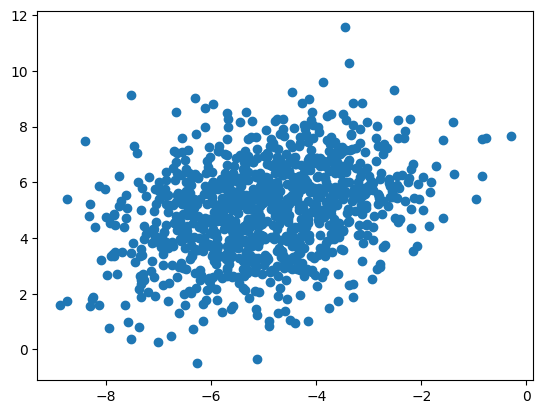

In [ ]:
x = data[:,0]
y = data[:,1]

plt.scatter(x,y)

### Part 3

In [ ]:
eigen = np.linalg.eig(cov)
print(f"Eigenvalue is: \n{eigen.eigenvalues} \n Eigenvector is:\n{eigen.eigenvectors}")

Eigenvalue is: 
[1.55660189 3.44339811] 
 Eigenvector is:
[[-0.87464248 -0.48476853]
 [ 0.48476853 -0.87464248]]


### Part 4

In [ ]:
# Calculate mean:
mu_X = 0
mu_Y = 0
size = 1000
for d in data:
  mu_X += d[0]
  mu_Y += d[1]
mu_X = mu_X/size
mu_Y = mu_Y/size
mu_matrix = np.array([[mu_X], [ mu_Y]])
print(f"Mean matrix is: \n{mu_matrix}")

# Calculate covariance matrix
var_X = 0
var_Y = 0
cov_XY = 0
for d in data:
  var_X += (d[0] - mu_X) ** 2
  var_Y += (d[1] - mu_Y) ** 2
  cov_XY += (d[0] - mu_X) * (d[1] - mu_Y)
var_X = var_X/size
var_Y = var_Y/size
cov_XY = cov_XY/size
cov_matrix = np.array([[var_X, cov_XY], [cov_XY, var_Y]])
print(f"Covariance matrix is: \n{cov_matrix}")

Mean matrix is: 
[[-4.97678494]
 [ 4.99769125]]
Covariance matrix is: 
[[2.03176695 0.77216187]
 [0.77216187 2.91699454]]


### Problem 5: Central Limit Theorem (Optional, recommended)

Back in your probability/statistics class, you learned the Law of Large Numbers, and the Central Limit Theorem, among many other things. The Law of Large Numbers says that if $X_i$ are independent and identically distributed (iid) random variables, then $(1/N) \sum X_i$ converges to $\mathbb{E}[X]$. That's the law of large numbers.

You also learned the Central Limit Theorem. This says that if $X_i$ are zero mean, have variance 1, and are iid, then $(1/\sqrt{N}) \sum X_i$ converges to a random variable. Which random variable? A standard (zero mean, unit variance) Gaussian.

We're going to check the central limit theorem empirically, as an excuse to do more practice with Python and numpy and basic plotting.

Let $X_i$ be an iid Bernoulli random variable with value \{-1,1\}. Look at the random variable
$Z_n = \frac{1}{\sqrt{n}}\sum X_i$. By taking 1000 samples from $Z_n$, plot its histogram. **Note**: To generate 1,000 samples from $Z_n$, you need to generate $1,000 \times n$ samples of $X_i$, since each $Z$ needs $1,000$ $X_i$'s. Now check that for small $n$ (set $n= 5$) $Z_n$ does not look that much like a Gaussian, but when $n$ is bigger (set $n = 50$) it looks much more like a Gaussian. Check also for much bigger $n$: $n = 250$, to see that at this point, one can really see the bell curve.

In [ ]:
# Create Z_n data
np.random.seed(42)

n = 5
Z_5 = []
for i in range(n):
  data = np.random.binomial(1, 0.5, size=1000)
  data = 2 * data - 1
  Z_5.append(1/np.sqrt(n)*sum(data))

In [ ]:
n = 50
Z_50 = []
for i in range(n):
  data = np.random.binomial(1, 0.5, size=1000)
  data = 2 * data - 1
  Z_50.append(1/np.sqrt(n)*sum(data))

In [ ]:
n = 250
Z_250 = []
for i in range(n):
  data = np.random.binomial(1, 0.5, size=1000)
  data = 2 * data - 1
  Z_250.append(1/np.sqrt(n)*sum(data))

Text(0, 0.5, 'Frequency')

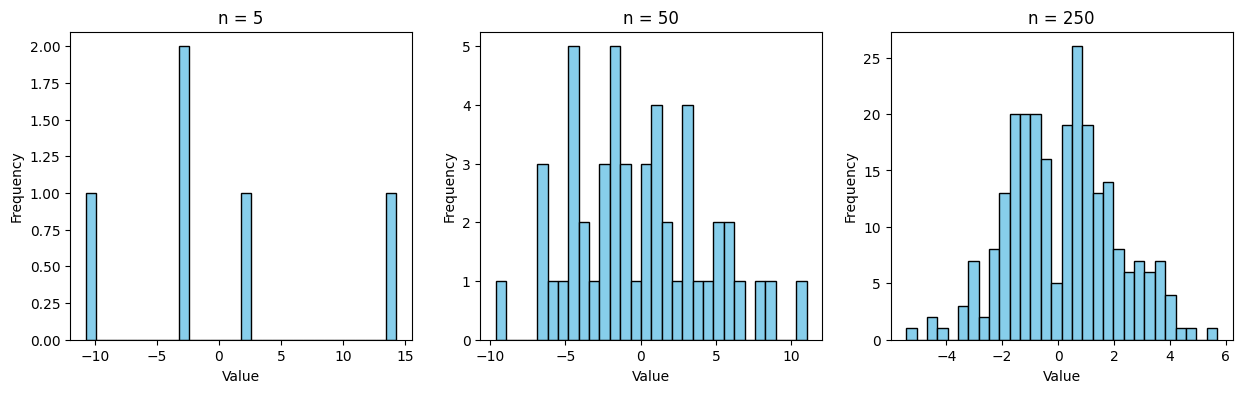

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(Z_5, bins=30, color="skyblue", edgecolor="black")
axes[0].set_title("n = 5")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

axes[1].hist(Z_50, bins=30, color="skyblue", edgecolor="black")
axes[1].set_title("n = 50")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

axes[2].hist(Z_250, bins=30, color="skyblue", edgecolor="black")
axes[2].set_title("n = 250")
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Frequency")